In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import numpy as np
import folium

In [6]:
# Reading Shapefile:
path=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Shape_Data\local_unit (1).shp"
gdf=gpd.read_file(path)
gdf.head()

,geometry
0,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


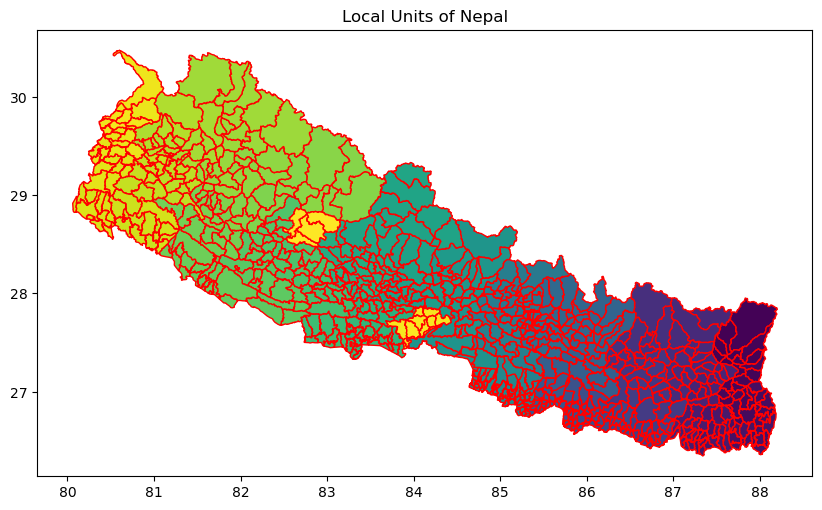

In [7]:
# plotting the shapefile:
gdf.plot(figsize=(10,7),edgecolor="red",cmap="viridis")
plt.title("Local Units of Nepal")
plt.show()

The shapefile contains the geometery of all the local units of Nepal.

## EDA for shapefile

In [23]:
# checking null values
gdf.isnull().sum()

geometry    0
dtype: int64

- There is no any null data

## Dealing with Raster File

### Temperature 2020 Raster file

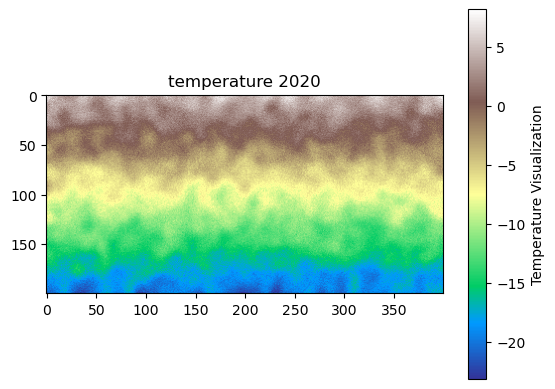

<Figure size 1000x1000 with 0 Axes>

12
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5)}


In [66]:
raster_1_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_temperature_2020.tif"

with rasterio.open(raster_1_file) as src:
    raster_1_file=src.read(12) # 1 represents the color Band
    plt.imshow(raster_1_file,cmap='terrain')
    plt.colorbar(label="Temperature Visualization")
    plt.title("temperature 2020")
    plt.figure(figsize=(10,10))
    plt.show()
    num_bands=src.count
    print(num_bands)
    print(src.meta)

In [69]:
## Statistics:
temp_2020=raster_1_file.flatten()
np.min(temp_2020),np.max(temp_2020),np.mean(temp_2020),np.std(temp_2020),



(-23.161365383208686, 8.158588781501129, -7.576094416481616, 7.292037698572679)

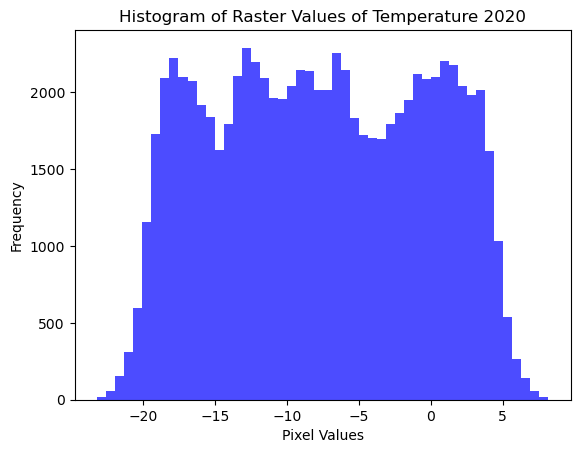

In [64]:
## Pixel visualisation
plt.hist(temp_2020, bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Histogram of Raster Values of Temperature 2020")
plt.show()


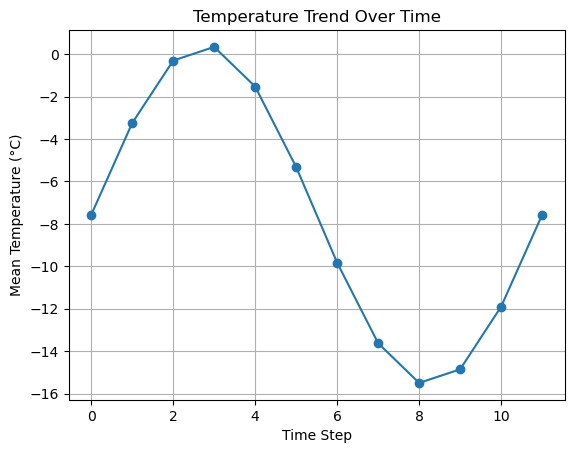

In [65]:
# temperature trend over time
raster_1_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_temperature_2020.tif"
with rasterio.open(raster_1_file) as src:
    temp_data = np.array([src.read(i + 1) for i in range(src.count)])  # Read all bands

# Compute mean temperature for each time step
mean_temps = np.mean(temp_data, axis=(1, 2))  # Average over spatial dimensions

# Plot temperature trend
plt.plot(mean_temps, marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Mean Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.grid()
plt.show()


Conclusion: It can be seen that the mean temperature increase duing the first quater of the month and decreses in the next two quarter and then increase in the next quarter.

## Temperature 2050

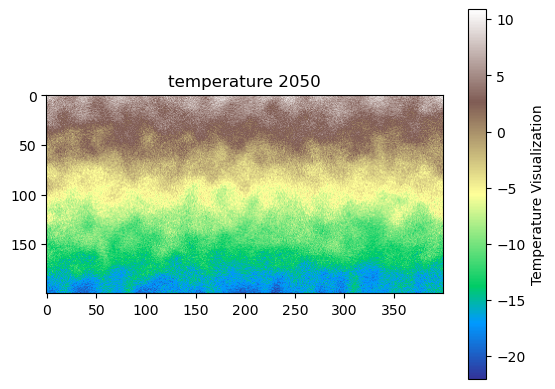

<Figure size 1000x1000 with 0 Axes>

12
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5)}


In [67]:
raster_2_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_temperature_2050.tif"

with rasterio.open(raster_2_file) as src:
    raster_2_file=src.read(12) # 1 represents the color Band
    plt.imshow(raster_2_file,cmap='terrain')
    plt.colorbar(label="Temperature Visualization")
    plt.title("temperature 2050")
    plt.figure(figsize=(10,10))
    plt.show()
    num_bands=src.count
    print(num_bands)
    print(src.meta)

In [68]:
## Statistics:
temp_2050=raster_2_file.flatten()
np.min(temp_2050),np.max(temp_2050),np.mean(temp_2050),np.std(temp_2050)



(-22.03140952502583, 10.882339703638277, -5.470211331438775, 7.153788132068485)

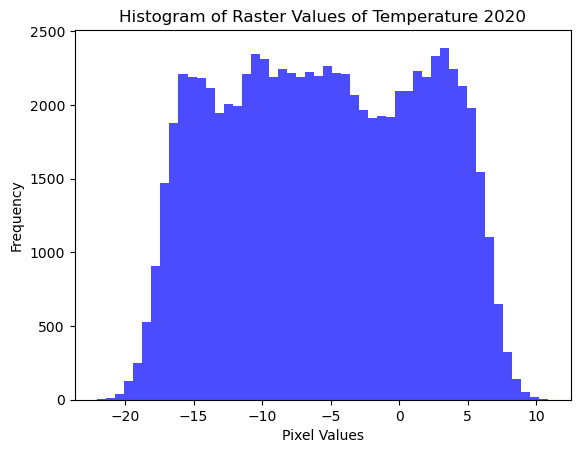

In [70]:
## Pixel visualisation
plt.hist(temp_2050, bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Histogram of Raster Values of Temperature 2020")
plt.show()

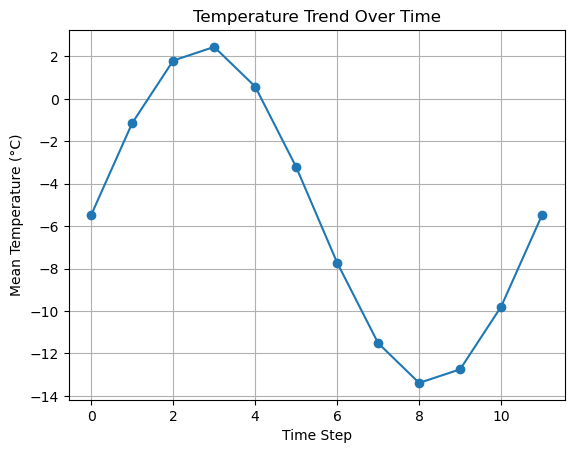

In [71]:
# temperature trend over time
raster_2_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_temperature_2050.tif"
with rasterio.open(raster_2_file) as src:
    temp_data = np.array([src.read(i + 1) for i in range(src.count)])  # Read all bands

# Compute mean temperature for each time step
mean_temps = np.mean(temp_data, axis=(1, 2))  # Average over spatial dimensions

# Plot temperature trend
plt.plot(mean_temps, marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Mean Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.grid()
plt.show()

It can be inferred from the graph that the mean temperrature increases during the first quarter of the month and in the next two quarter it decreases, however it increases in the last quarter.

# Precipitation 2020

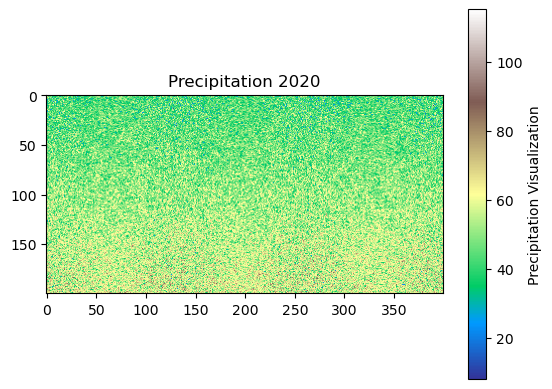

<Figure size 1000x1000 with 0 Axes>

12
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5)}


In [72]:
# Loading the data:
raster_3_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_precipitation_2020.tif"

with rasterio.open(raster_3_file) as src:
    raster_3_file=src.read(12) # 1 represents the color Band
    plt.imshow(raster_3_file,cmap='terrain')
    plt.colorbar(label="Precipitation Visualization")
    plt.title("Precipitation 2020")
    plt.figure(figsize=(10,10))
    plt.show()
    num_bands=src.count
    print(num_bands)
    print(src.meta)

In [73]:
## Statistics:
prep_2020=raster_3_file.flatten()
np.min(prep_2020),np.max(prep_2020),np.mean(prep_2020),np.std(prep_2020)

(7.99927314471394, 115.34158080291374, 50.8372840628074, 11.387224332279002)

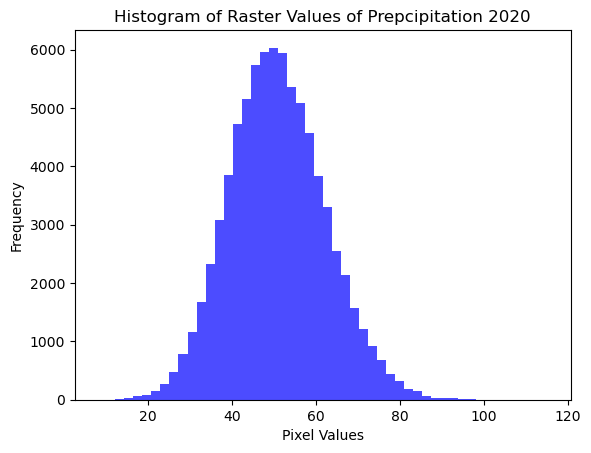

In [74]:
## Pixel visualisation
plt.hist(prep_2020, bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Histogram of Raster Values of Prepcipitation 2020")
plt.show()

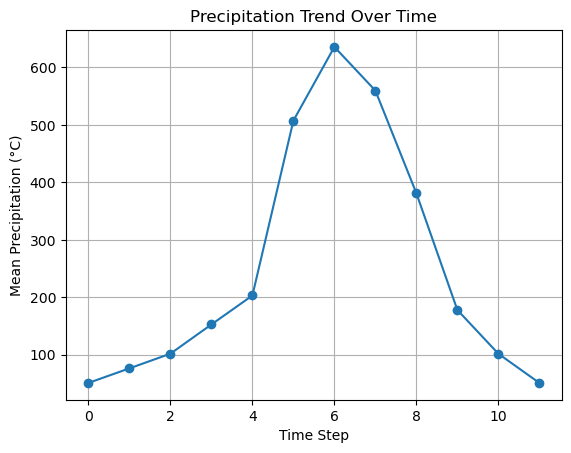

In [76]:
# Precipitation trend over time
raster_3_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_precipitation_2020.tif"
with rasterio.open(raster_3_file) as src:
    prep_data = np.array([src.read(i + 1) for i in range(src.count)])  # Read all bands

# Compute mean temperature for each time step
mean_preps = np.mean(prep_data, axis=(1, 2))  # Average over spatial dimensions

# Plot precipitaion trend
plt.plot(mean_preps, marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Mean Precipitation (°C)")
plt.title("Precipitation Trend Over Time")
plt.grid()
plt.show()

It can be inferred from the graph that the precipitaion increases from 1st month reaching upto the maximum in 6th month , from there it decreses over the next six months

# Precipitation 2050

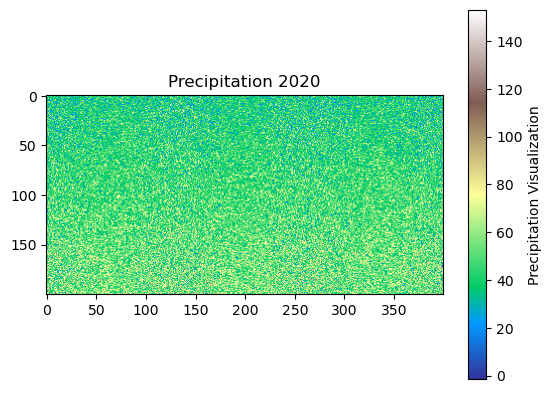

<Figure size 1000x1000 with 0 Axes>

12
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5)}


In [77]:
# Loading the data:
raster_4_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_precipitation_2050.tif"

with rasterio.open(raster_4_file) as src:
    raster_4_file=src.read(12) # 1 represents the color Band
    plt.imshow(raster_4_file,cmap='terrain')
    plt.colorbar(label="Precipitation Visualization")
    plt.title("Precipitation 2050")
    plt.figure(figsize=(10,10))
    plt.show()
    num_bands=src.count
    print(num_bands)
    print(src.meta)

In [78]:
## Statistics:
prep_2050=raster_4_file.flatten()
np.min(prep_2050),np.max(prep_2050),np.mean(prep_2050),np.std(prep_2050)

(-1.5756451105165434,
 153.15749190852097,
 48.330607939145374,
 16.38946030540896)

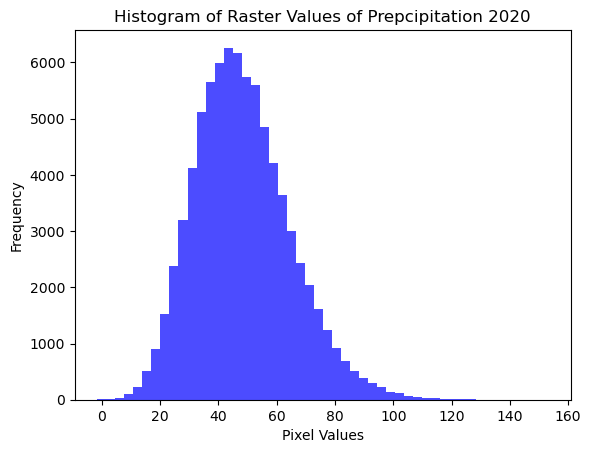

In [79]:
## Pixel visualisation
plt.hist(prep_2050, bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Values")
plt.ylabel("Frequency")
plt.title("Histogram of Raster Values of Prepcipitation 2020")
plt.show()

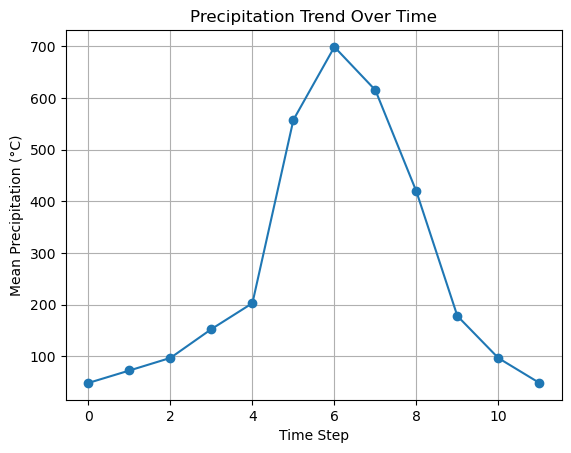

In [80]:
# Precipitation trend over time
raster_4_file=r"C:\Users\Sanjay Sah\Desktop\gis_assignment\Nepal_climate_data\nepal_precipitation_2050.tif"
with rasterio.open(raster_4_file) as src:
    prep_data = np.array([src.read(i + 1) for i in range(src.count)])  # Read all bands

# Compute mean temperature for each time step
mean_preps = np.mean(prep_data, axis=(1, 2))  # Average over spatial dimensions

# Plot precipitaion trend
plt.plot(mean_preps, marker='o', linestyle='-')
plt.xlabel("Time Step")
plt.ylabel("Mean Precipitation (°C)")
plt.title("Precipitation Trend Over Time")
plt.grid()
plt.show()

In [ ]:
Again, it can be inferrd from the above graph that, the precipitaion increases from the very 1st month of the year, reaching maximum in the month 6 and then decreases over the next 6 months.